# BIGMART SALES PROJECT

Bigmart is a big supermarket chain,  with stores all around the country. The management of the shop had set our a challenge to all Data Scientist to help them create a model that can **predict the sales per product** for each store.

The shop has collected sales data of products across 10 stores in different cities over a given period of time.

**Breakdown of the Problem Statement**

This is a **supervised machine learning problem** with a target label as: **(Item_Outlet_Sales)**

Also since we are expected to predict the sale price for a given product, it becomes a **regression task**

### Import the libraries

In [1]:
from pyforest import*

### Import the dataset

In [1]:
train_data = pd.read_csv('bigmart_train.csv')
test_data = pd.read_csv('bigmart_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [31]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [37]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [38]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [39]:
train_data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [41]:
import random
word = ['Small','Medium','High']
gg = random.choice(word)
gg

'Small'

In [11]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [15]:
train_data['Item_Weight'].head(20)

0      9.300
1      5.920
2     17.500
3     19.200
4      8.930
5     10.395
6     13.650
7        NaN
8     16.200
9     19.200
10    11.800
11    18.500
12    15.100
13    17.600
14    16.350
15     9.000
16    11.800
17     9.000
18       NaN
19    13.350
Name: Item_Weight, dtype: float64

In [35]:
train_data['Outlet_Size'].head(20)

0     Medium
1     Medium
2     Medium
3        NaN
4       High
5     Medium
6       High
7     Medium
8        NaN
9        NaN
10    Medium
11     Small
12    Medium
13     Small
14      High
15     Small
16    Medium
17    Medium
18    Medium
19     Small
Name: Outlet_Size, dtype: object

In [ ]:
nan_columns = df.columns[df.isna().any()]

# Impute the NaN values with the mean of the column
for column in nan_columns:
    df[column].fillna(df[column].mean(), inplace=True)


In [33]:
nan_col = train_data.Item_Weight[train_data['Item_Weight'].isna()]
train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(), inplace=True)
train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(), inplace=True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [44]:
train_data['Outlet_Size'].fillna(gg, inplace=True)
train_data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [46]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,8523.0,12.857645,4.226124,4.555,9.310000,12.857645,16.000000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [52]:
test_data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [54]:
test_data['Item_Weight'].fillna(test_data['Item_Weight'].mean(),inplace=True)
test_data['Outlet_Size'].fillna(gg,inplace=True)
train_data.shape, test_data.shape

((8523, 12), (5681, 11))

In [2]:
train_data1 = pd.read_csv('bigmart_train.csv')
test_data1 = pd.read_csv('bigmart_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
train_data1['Source'] = 'train'
test_data1['Source'] = 'test'

df = pd.concat([train_data1,test_data1],ignore_index=True)

<IPython.core.display.Javascript object>

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [5]:
df['Source'].value_counts()

train    8523
test     5681
Name: Source, dtype: int64

In [61]:
df.shape

(14204, 13)

In [62]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Source                          0
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

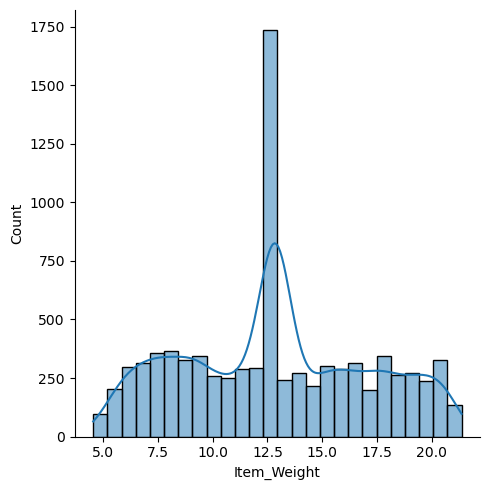

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

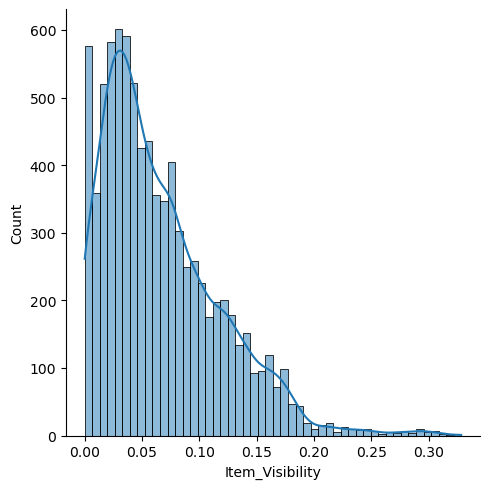

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

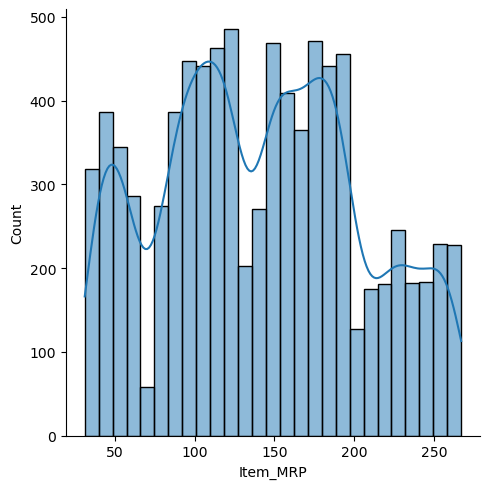

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

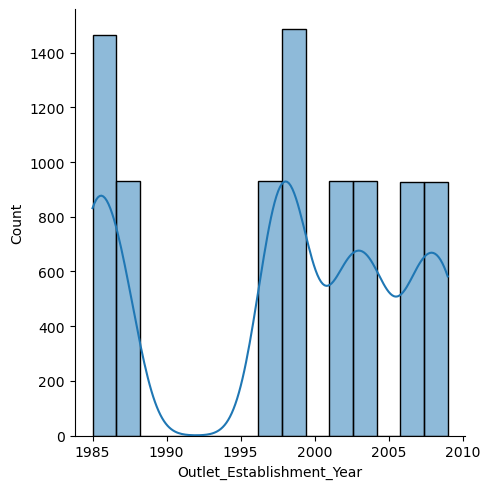

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

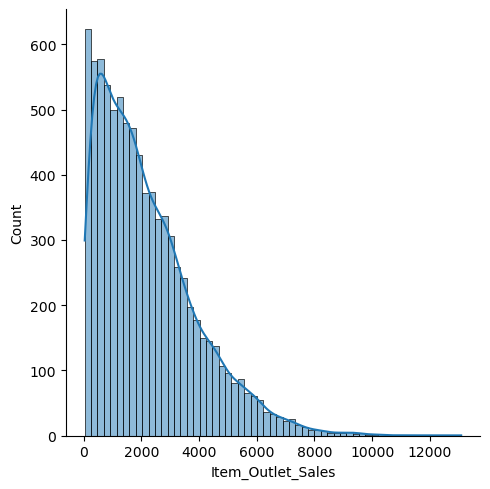

In [64]:
  for i in train_data.describe().columns:
        sns.displot(data=train_data[i].dropna(),kde=True)
        plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

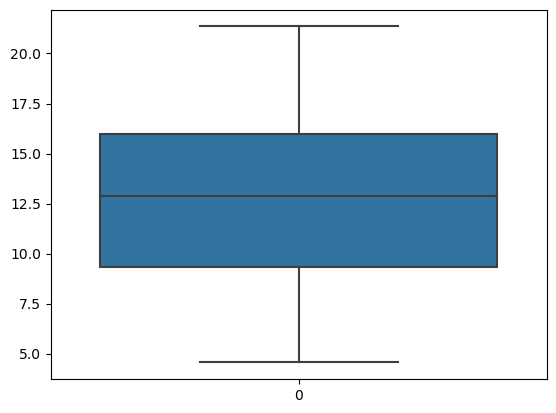

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

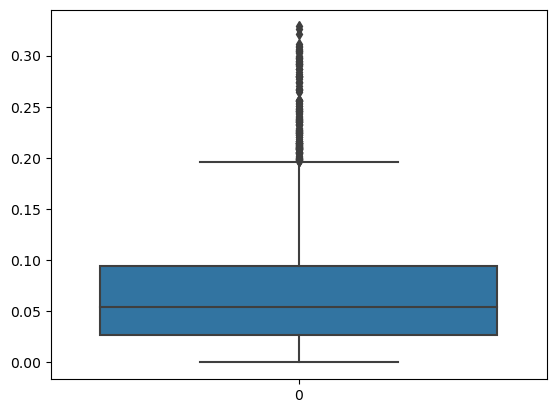

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

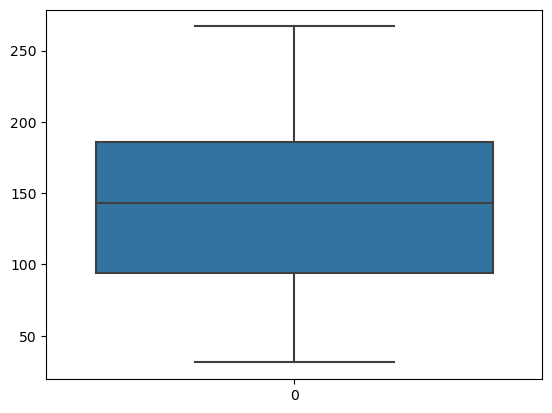

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

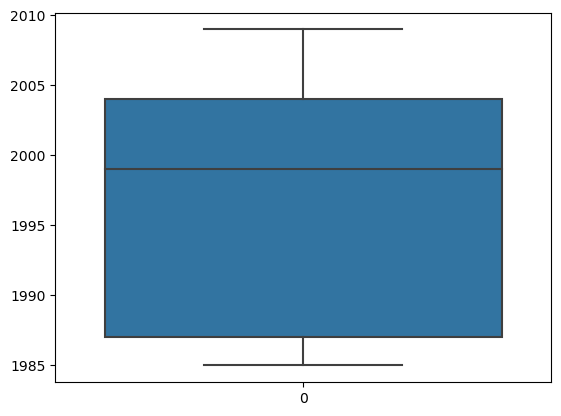

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

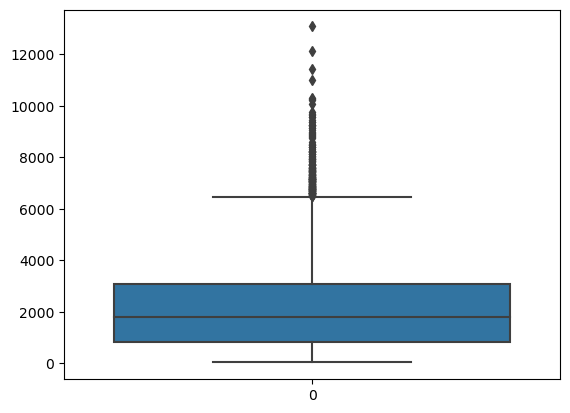

In [98]:
  for i in train_data.describe().columns:
        sns.boxplot(data=train_data[i].dropna())
        plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

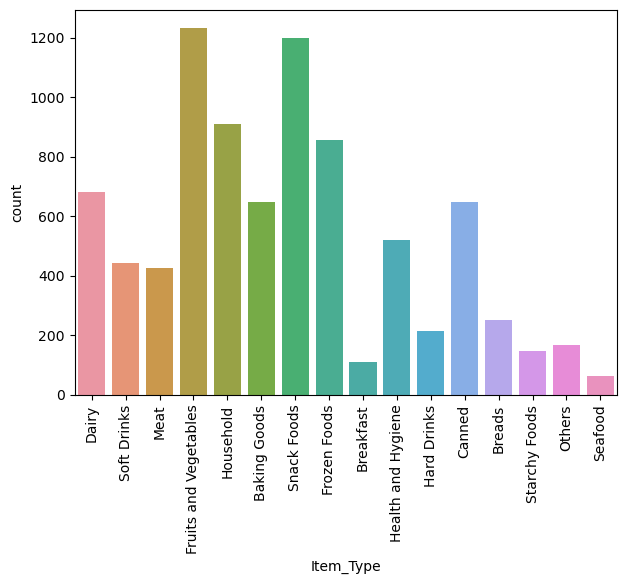

In [71]:
plt.figure(figsize=(7,5))
sns.countplot(data=df,x=train_data['Item_Type'])
plt.xticks(rotation=90)

In [72]:
train_data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([0, 1, 2]),
 [Text(0, 0, 'Medium'), Text(1, 0, 'Small'), Text(2, 0, 'High')])

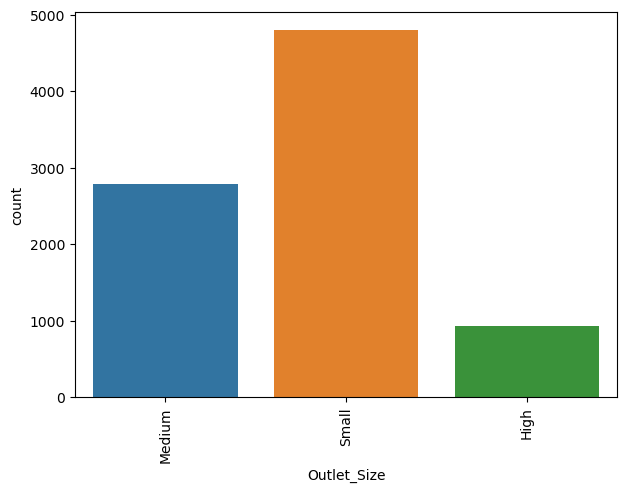

In [73]:
plt.figure(figsize=(7,5))
sns.countplot(data=df,x=train_data['Outlet_Size'])
plt.xticks(rotation=90)

In [74]:
train_data['Outlet_Size'].value_counts()

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

In [75]:
train_data['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: title={'center': 'Item_Weight and Item_Outlet_Sales Analysis'}, xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

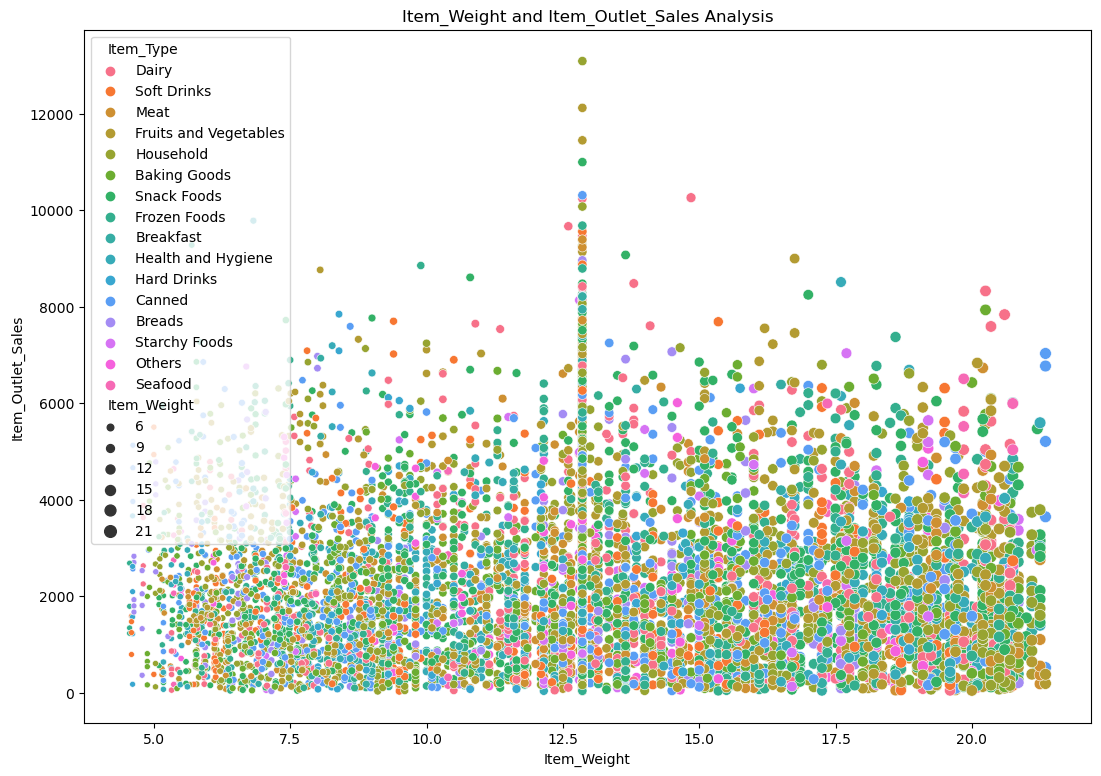

In [76]:
plt.figure(figsize=(13,9))
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_Weight and Item_Outlet_Sales Analysis')
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales',hue='Item_Type', size='Item_Weight',data=train_data)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\CJay\AppData\Local\Temp\ipykernel_1664\3001143041.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(),vmax=1, square=True,annot=True, cmap='viridis')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

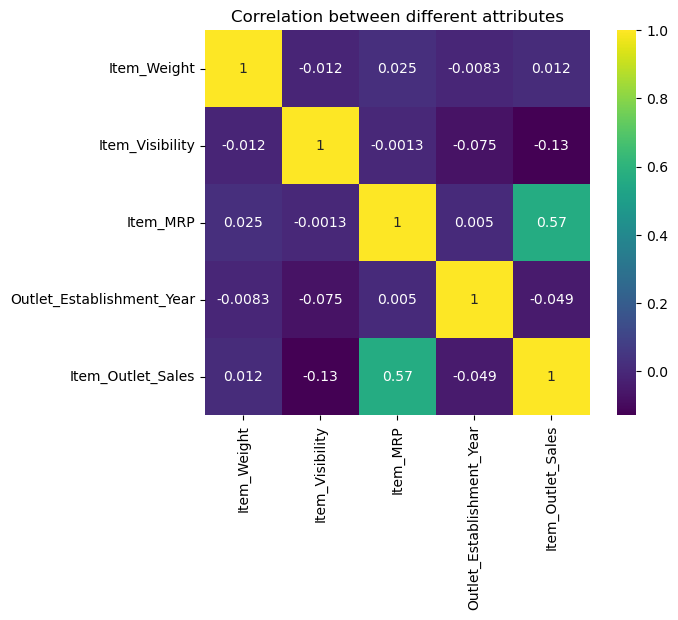

In [90]:
plt.figure(figsize=(7,5))
sns.heatmap(train_data.corr(),vmax=1, square=True,annot=True, cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()

In [83]:
df['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [4]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [57]:
df['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [91]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test


In [99]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Source                          0
dtype: int64

# Feature Engineering and Transformation

### Treating the Missing Values

**Item_Weight**

The **item_weight** column is approx. **Gaussian(Normal distribution)** so it will be a good choice to replace thr NaN values with the **Mean** of the column

In [5]:
# This will Replace NaN with the Mean of the Item Weight
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

In [30]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Source                          0
dtype: int64

**Outlet_size**

Replacing the NaN values in the **Outlet_Size** column with **Median** since we don't precisely know the outlet size, so we cannot say it is **Large** or it is **Small**, but **Medium** lies in between large and small so it is ideal to consider it that way and also the model is Medium

In [31]:
df['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [6]:
df['Outlet_Size'].fillna('Medium', inplace=True)

In [33]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Source                          0
dtype: int64

In [13]:
df['Item_Outlet_Sales']

0        3735.1380
1         443.4228
2        2097.2700
3         732.3800
4         994.7052
           ...    
14199          NaN
14200          NaN
14201          NaN
14202          NaN
14203          NaN
Name: Item_Outlet_Sales, Length: 14204, dtype: float64

**Item_Outlet_Sales** will be having NULL values. The **Test_data** does not have any column of **Item_Outlet_Sales**, it is only in the Train_data. Also you can notice that our df is consisting of 12 columns because our train data was having 12 columns BUT our test data is having 11 columns so sisnce it is not having item_outlet_sales , we expect it to be filled with NaN. besides that our model target column so we need not to worry about it

**Item Visibility**

The Item_Visibility had the minimum value of 0 from our earlier descriptive statistics, but all the items needed to be visible to the customers. Meaning those items that were not available obviously did not have visibility and were captured as 0. This is an indication that we need to treat this as missing value

In [37]:
df[df['Item_Visibility']==0]['Item_Visibility'].count()

0

In [7]:
df['Item_Visibility'].replace(0.0,df['Item_Visibility'].median(), inplace=True)

**Outlet Years**

In [39]:
df['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [43]:
gg = 2009 - df['Outlet_Establishment_Year']
gg.value_counts()

24    2439
22    1553
10    1550
12    1550
5     1550
7     1548
0     1546
2     1543
11     925
Name: Outlet_Establishment_Year, dtype: int64

In [8]:
# Creating the Years it had before 2009
df['Outlet_Years'] = 2009 - df['Outlet_Establishment_Year']

In [48]:
df['Outlet_Years'].describe()


count    14204.000000
mean        11.169319
std          8.371664
min          0.000000
25%          5.000000
50%         10.000000
75%         22.000000
max         24.000000
Name: Outlet_Years, dtype: float64

In [49]:
df['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [50]:
df['Outlet_Identifier'].value_counts()

OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

A closer look at each of the Item_Identifier shows that they with either "FD", "DR"(Drinks), "NC"(Non-Consumables)

For us to do a better analysis, we will be creating 3 categories as pointed out instead of the already existing 16 categories.

In [9]:
# Changing only the first 2 characters (the category ID)
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[0:2])

In [10]:
# Rename them to more intuitive categories:
df['New_Item_Type'] = df['New_Item_Type'].map({'FD':'Food','NC':'Non-Consumables','DR':'Drinks'})
df['New_Item_Type'].value_counts()

Food               10201
Non-Consumables     2686
Drinks              1317
Name: New_Item_Type, dtype: int64

**If a product is non-consumable they why associate a fat-content to them? We will get rid of this**

In [11]:
# Mark non-consumables as seperate category in low_fat:
df.loc[df['New_Item_Type']=="Non-Consumables",'Item_Fat_Content']= "Non-Edible"
df['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

Under normal circumstance, if a product is more visible, then it's likely it will be getting higher sales. We can based on that hypothesis and create importance given to a product in a given store according to the mean of significance given to the same product in all other stores.

In [12]:
item_visib_avg = df.pivot_table(values='Item_Visibility', index='Item_Identifier')

In [13]:
item_visib_avg

,Item_Visibility
Item_Identifier,
DRA12,0.046942
DRA24,0.045646
DRA59,0.138786
DRB01,0.086489
DRB13,0.012801
...,...
NCZ30,0.032704
NCZ41,0.063148
NCZ42,0.016417


In [14]:
funtion = lambda x: x['Item_Visibility']/item_visib_avg['Item_Visibility'][item_visib_avg.index == x['Item_Identifier']][0]
df['item_visib_avg'] = df.apply(funtion,axis=1).astype(float)

In [62]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source,Outlet_Years,New_Item_Type,item_visib_avg
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,10,Food,0.931078
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,0,Drinks,0.933420
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,10,Food,0.733187
3,FDX07,19.200000,Regular,0.054021,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,11,Food,1.810406
4,NCD19,8.930000,Non-Edible,0.054021,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,22,Non-Consumables,1.944117
5,FDP36,10.395000,Regular,0.054021,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,train,0,Food,0.698695
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,train,22,Food,0.423037
7,FDP10,12.792854,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,train,24,Food,0.870493
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986,train,7,Food,0.924160
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350,train,2,Food,0.913611


## Dealing with our Categorical Variable

**Label Encoder**

 We will be converting all categorical variables into numeric types (Values of 0 or 1) using the LabelEncoder function since we cannot build model on them.

In [15]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

# New variable for outlet
df['Outlet'] = label.fit_transform(df['Outlet_Identifier'])
varib = ['Item_Fat_Content', 'Outlet_Location_Type','Outlet_Size', 'New_Item_Type','Outlet_Type','Outlet']
for i in varib:
    df[i] = label.fit_transform(df[i])

In [65]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source,Outlet_Years,New_Item_Type,item_visib_avg,Outlet
0,FDA15,9.300000,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,train,10,1,0.931078,9
1,DRC01,5.920000,2,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,train,0,0,0.933420,3
2,FDN15,17.500000,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,train,10,1,0.733187,9
3,FDX07,19.200000,2,0.054021,Fruits and Vegetables,182.0950,OUT010,1998,1,2,0,732.3800,train,11,1,1.810406,0
4,NCD19,8.930000,1,0.054021,Household,53.8614,OUT013,1987,0,2,1,994.7052,train,22,2,1.944117,1
5,FDP36,10.395000,2,0.054021,Baking Goods,51.4008,OUT018,2009,1,2,2,556.6088,train,0,1,0.698695,3
6,FDO10,13.650000,2,0.012741,Snack Foods,57.6588,OUT013,1987,0,2,1,343.5528,train,22,1,0.423037,1
7,FDP10,12.792854,0,0.127470,Snack Foods,107.7622,OUT027,1985,1,2,3,4022.7636,train,24,1,0.870493,5
8,FDH17,16.200000,2,0.016687,Frozen Foods,96.9726,OUT045,2002,1,1,1,1076.5986,train,7,1,0.924160,7
9,FDU28,19.200000,2,0.094450,Frozen Foods,187.8214,OUT017,2007,1,1,1,4710.5350,train,2,1,0.913611,2


In [16]:
df = pd.get_dummies(df, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','New_Item_Type','Outlet_Type','Outlet'])
df.dtypes

<IPython.core.display.Javascript object>

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
Source                        object
Outlet_Years                   int64
item_visib_avg               float64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
New_Item_Type_0                uint8
New_Item_Type_1                uint8
New_Item_Type_2                uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
O

In [69]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Source,Outlet_Years,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,train,10,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,train,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,train,10,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.054021,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,train,11,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.054021,Household,53.8614,OUT013,1987,994.7052,train,22,...,0,1,0,0,0,0,0,0,0,0


# Model Building

In [19]:
df.drop(['Item_Type','Outlet_Establishment_Year'], axis =1 ,inplace = True)

In [22]:
train = df.loc[df['Source']=='train']
test = df.loc[df['Source']=='test']

In [26]:
train.drop('Source',axis=1, inplace=True)
test.drop('Source',axis=1, inplace=True)

C:\Users\CJay\AppData\Local\Temp\ipykernel_11828\749147954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop('Source',axis=1, inplace=True)
C:\Users\CJay\AppData\Local\Temp\ipykernel_11828\749147954.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop('Source',axis=1, inplace=True)


In [29]:
test.drop(['Item_Outlet_Sales'], axis = 1, inplace=True)

C:\Users\CJay\AppData\Local\Temp\ipykernel_11828\3579235096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(['Item_Outlet_Sales'], axis = 1, inplace=True)


In [31]:
x_train = train.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'],axis = 1)
y_train = train['Item_Outlet_Sales']
x_test = test.drop(['Item_Identifier','Outlet_Identifier'], axis=1).copy()

### Linear Regression Model

In [32]:
# Import the library 
from sklearn.linear_model import LinearRegression

# Create the model
model_lr = LinearRegression()

# Fit the model
model_lr.fit(x_train,y_train)

# predict the model
lr_pred = model_lr.predict(x_test)

In [33]:
# evaluate the model
lr_acc = round(model_lr.score(x_train,y_train)*100,2)
lr_acc

56.35

# Decision Tree Regressor

In [38]:
# Import the libraries
from sklearn.tree import DecisionTreeRegressor

# Create the model
model_tree = DecisionTreeRegressor(max_depth=15,min_samples_leaf=100)

# Fit the model
model_tree.fit(x_train,y_train)

# Predict the model
tree_pred = model_tree.predict(x_test)

In [39]:
tree_acc = round(model_tree.score(x_train,y_train)*100,2)
tree_acc

61.48

### XGBoost Regressor

In [41]:
from xgboost import XGBRegressor

# Create the model
model_xg = XGBRegressor(n_estimators=1000, learning_rate=0.05)

# Fit the model
model_xg.fit(x_train,y_train)

# Predict the model
xg_pred = model_xg.predict(x_test)

In [42]:
xg_acc = round(model_xg.score(x_train,y_train)*100,2)
xg_acc

87.56

### Random FOrest Regressor

In [48]:
# import the library
from sklearn.ensemble import RandomForestRegressor

# Create the model
model_rfr = RandomForestRegressor(n_estimators=400,max_depth=6,min_samples_leaf=100,n_jobs=4)

# Fit the model
model_rfr.fit(x_train,y_train)

# predict the model
rdc_pred = model_rfr.predict(x_test)

In [49]:
print(f"Train score: {round(model_rfr.score(x_train,y_train)*100,2)}")

Train score: 60.82


In [46]:
train.shape

(8523, 34)

### Random Forest CLassifier

In [52]:
# import the library
from sklearn.ensemble import RandomForestClassifier

# Create the model
model_rfc = RandomForestRegressor(n_estimators=500,max_depth=5,min_samples_leaf=100,random_state=42)

# Fit the model
model_rfc.fit(x_train,y_train)

# predict the model
rdc_pred = model_rfc.predict(x_test)

# Evaluate the model
print(f"Train score: {round(model_rfc.score(x_train,y_train)*100,2)}")

Train score: 60.44
